### Logistic regression (OR)

In [1]:
import random
from math import exp, log
import numpy as np
import matplotlib.pyplot as plt

### Data preparation

In [2]:
X = np.array([(0,0),(1,0),(0,1),(1,1)])
Y = np.array([0,1,1,1])
epoch_array = np.array([])
cost_array = np.array([])

### Model

In [3]:
class logistic_regression_model():
    def __init__(self):
        self.w = np.random.normal(size = 2)
        self.b = np.random.normal(size = 1)
        
    def sigmoid(self, z):
        return 1/(1 + exp(-z))
    
    def predict(self, x):
        z = np.inner(self.w, x) + self.b
        a = self.sigmoid(z)
        return a

In [4]:
model = logistic_regression_model()

### Training

In [5]:
def train(X, Y, model, lr):
    dw0 = 0.0
    dw1 = 0.0
    db = 0.0
    m = len(X)
    cost = 0.0
    for x,y in zip(X,Y):
        a = model.predict(x)
        if y == 1:
            cost -= log(a)
        else:
            cost -= log(1-a)
        
        dw0 += np.multiply(a-y, x[0])
        dw1 += np.multiply(a-y, x[1])
        db += (a-y)
        
    cost /= m
    model.w[0] -= lr * dw0/m
    model.w[1] -= lr * dw1/m
    model.b -= lr * db/m
    
    return cost

In [6]:
for epoch in range(10000):
    cost = train(X, Y, model, 0.1)
    epoch_array = np.append(epoch_array, epoch)
    cost_array = np.append(cost_array, cost)
    if epoch % 100 == 0:
        print(epoch, cost)

0 0.7874472802109931
100 0.3282167633734391
200 0.25734994592914606
300 0.21073185131751612
400 0.17765653102652046
500 0.1530815324687819
600 0.1341619316129397
700 0.1191847427231759
800 0.10705996870809374
900 0.09706183228958669
1000 0.08868887372674841
1100 0.08158389385666097
1200 0.07548586097111563
1300 0.07019981415199053
1400 0.06557736765319232
1500 0.06150370508580261
1600 0.05788867972251992
1700 0.05466058785266647
1800 0.05176172612238678
1900 0.04914516592656012
2000 0.04677237446629772
2100 0.04461143522016717
2200 0.04263569955468141
2300 0.04082275293401604
2400 0.039153613728441755
2500 0.037612106082353006
2600 0.03618436449247504
2700 0.03485843908148661
2800 0.0336239785943783
2900 0.032471973921650965
3000 0.031394549150851755
3100 0.030384790230454616
3200 0.029436603616528546
3300 0.028544598984477258
3400 0.027703991381067966
3500 0.026910519176568965
3600 0.026160374932476214
3700 0.025450146884523205
3800 0.024776769195477985
3900 0.024137479488643147
4000 

Text(0.5, 1.0, 'OR')

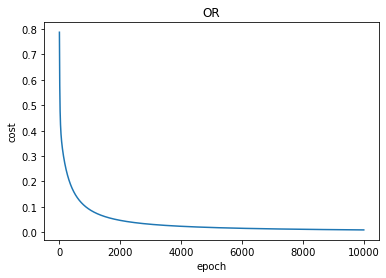

In [7]:
plt.plot(epoch_array, cost_array)
plt.xlabel('epoch')
plt.ylabel('cost')
plt.title('OR')

### Testing

In [8]:
model.predict((0,0))

0.03942015487010904

In [8]:
model.predict((0,1))

0.9918433567595195

In [9]:
model.predict((1,0))

0.9918273348811616

In [10]:
model.predict((1,1))

0.9999985858289085